#### Imports

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Reading the dataset

In [32]:
# Load the dataset

df = pd.read_csv('C:\\Users\\samri\\Documents\\C04_Data_Bank_Campaign.csv')

#### Printing the variables

In [13]:
# Print the variables

print("Variables : ")
print(df.head())

Variables : 
   Age  Job_Category Marital_Status  Education Credit_Default  Balance  \
0   58    management        married   tertiary             no     2143   
1   44    technician         single  secondary             no       29   
2   33  entrepreneur        married  secondary             no        2   
3   47   blue-collar        married    unknown             no     1506   
4   33       unknown         single    unknown             no        1   

  Housing_Loan Personal_Loan Contact_Type  Call_Day Call_Month  Call_Duration  \
0          yes            no      unknown         5        may            261   
1          yes            no      unknown         5        may            151   
2          yes           yes      unknown         5        may             76   
3          yes            no      unknown         5        may             92   
4           no            no      unknown         5        may            198   

   Campaign_Calls  PDays  PContact POutcome  Deposit_Su

#### Printing the variable types

In [31]:
# Print info about the dataset

print("\n Info about the Dataset")
print(df.info())


 Info about the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   45211 non-null  int64 
 1   Job_Category          45211 non-null  object
 2   Marital_Status        45211 non-null  object
 3   Education             45211 non-null  object
 4   Credit_Default        45211 non-null  object
 5   Balance               45211 non-null  int64 
 6   Housing_Loan          45211 non-null  object
 7   Personal_Loan         45211 non-null  object
 8   Contact_Type          45211 non-null  object
 9   Call_Day              45211 non-null  int64 
 10  Call_Month            45211 non-null  object
 11  Call_Duration         45211 non-null  int64 
 12  Campaign_Calls        45211 non-null  int64 
 13  PDays                 45211 non-null  int64 
 14  PContact              45211 non-null  int64 
 15  POutcome   

#### Summary Statistics

In [ ]:
# Print summary statistics

print("\nSummary Statistics : ")
print(df.describe())

#### Checking for missing values

In [16]:
# Check for missing values

print("\nMissing Values")
print(df.isnull().sum())


Missing Values
Age                     0
Job_Category            0
Marital_Status          0
Education               0
Credit_Default          0
Balance                 0
Housing_Loan            0
Personal_Loan           0
Contact_Type            0
Call_Day                0
Call_Month              0
Call_Duration           0
Campaign_Calls          0
PDays                   0
PContact                0
POutcome                0
Deposit_Subscription    0
dtype: int64


#### Distribution of target variable

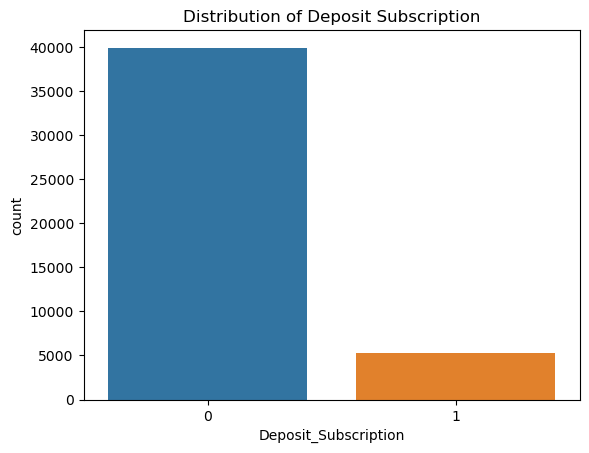

<Figure size 100x100 with 0 Axes>

In [36]:
# Distribution of the target variable

sns.countplot(x='Deposit_Subscription', data=df)
plt.title('Distribution of Deposit Subscription')
plt.figure(figsize=(1, 1))
plt.show()

#### Histogram for categorical variables

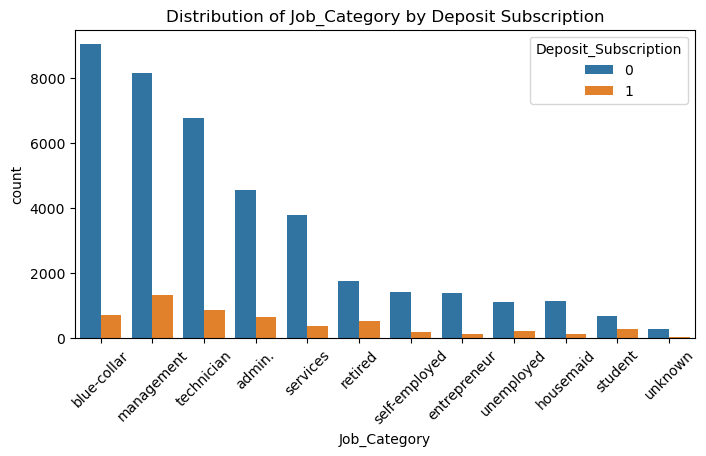

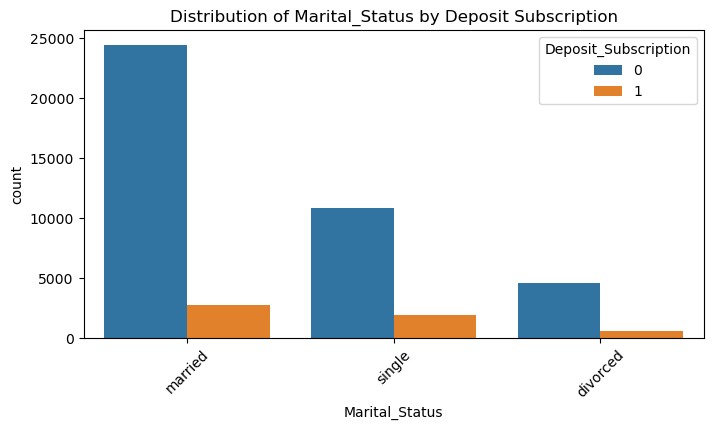

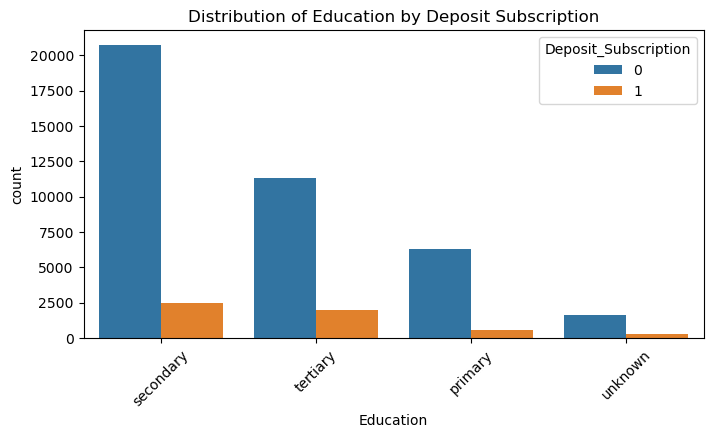

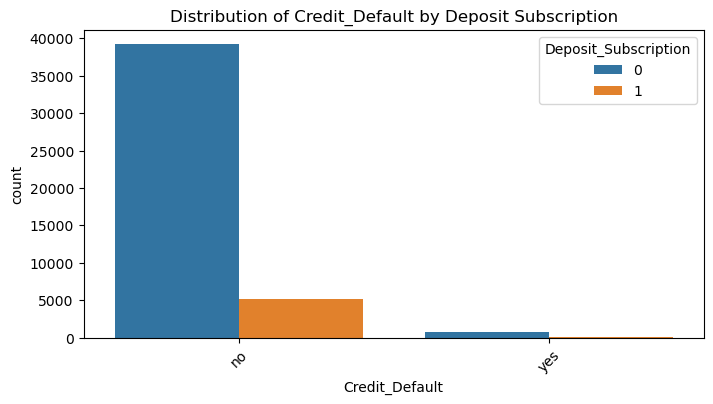

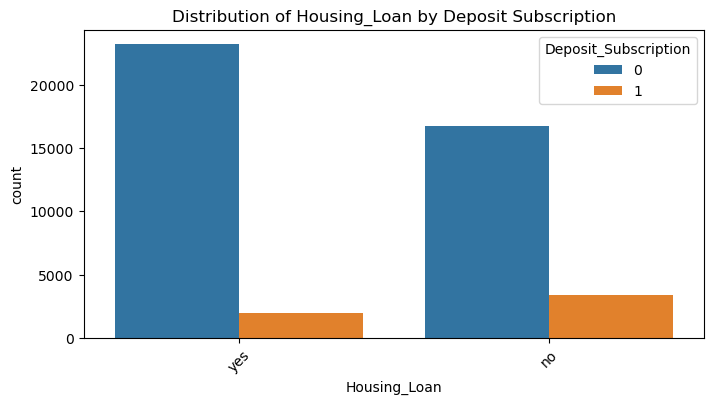

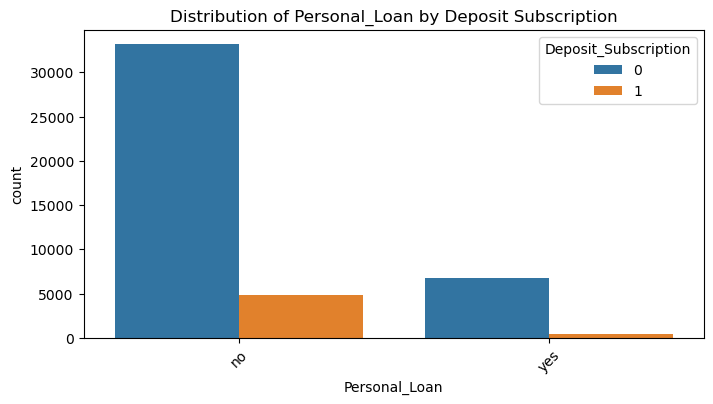

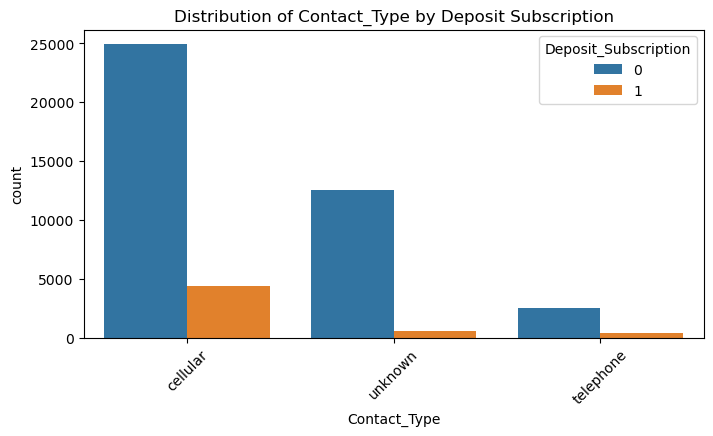

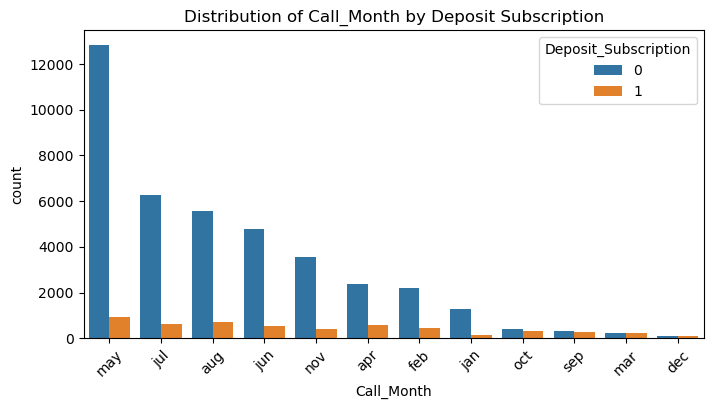

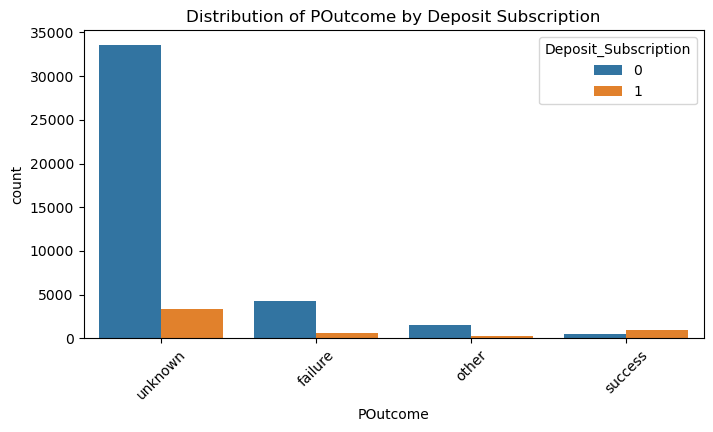

In [4]:
# Categorical features distribution

categorical_cols = ['Job_Category', 'Marital_Status', 'Education', 'Credit_Default', 'Housing_Loan', 'Personal_Loan', 'Contact_Type', 'Call_Month', 'POutcome']

for col in categorical_cols:
    # Get the sorted order based on count
    order = df[col].value_counts().index
    
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Deposit_Subscription', data=df, order=order)
    plt.title(f'Distribution of {col} by Deposit Subscription')
    plt.xticks(rotation=45)
    plt.show()


#### Stacked column chart for categorical variables

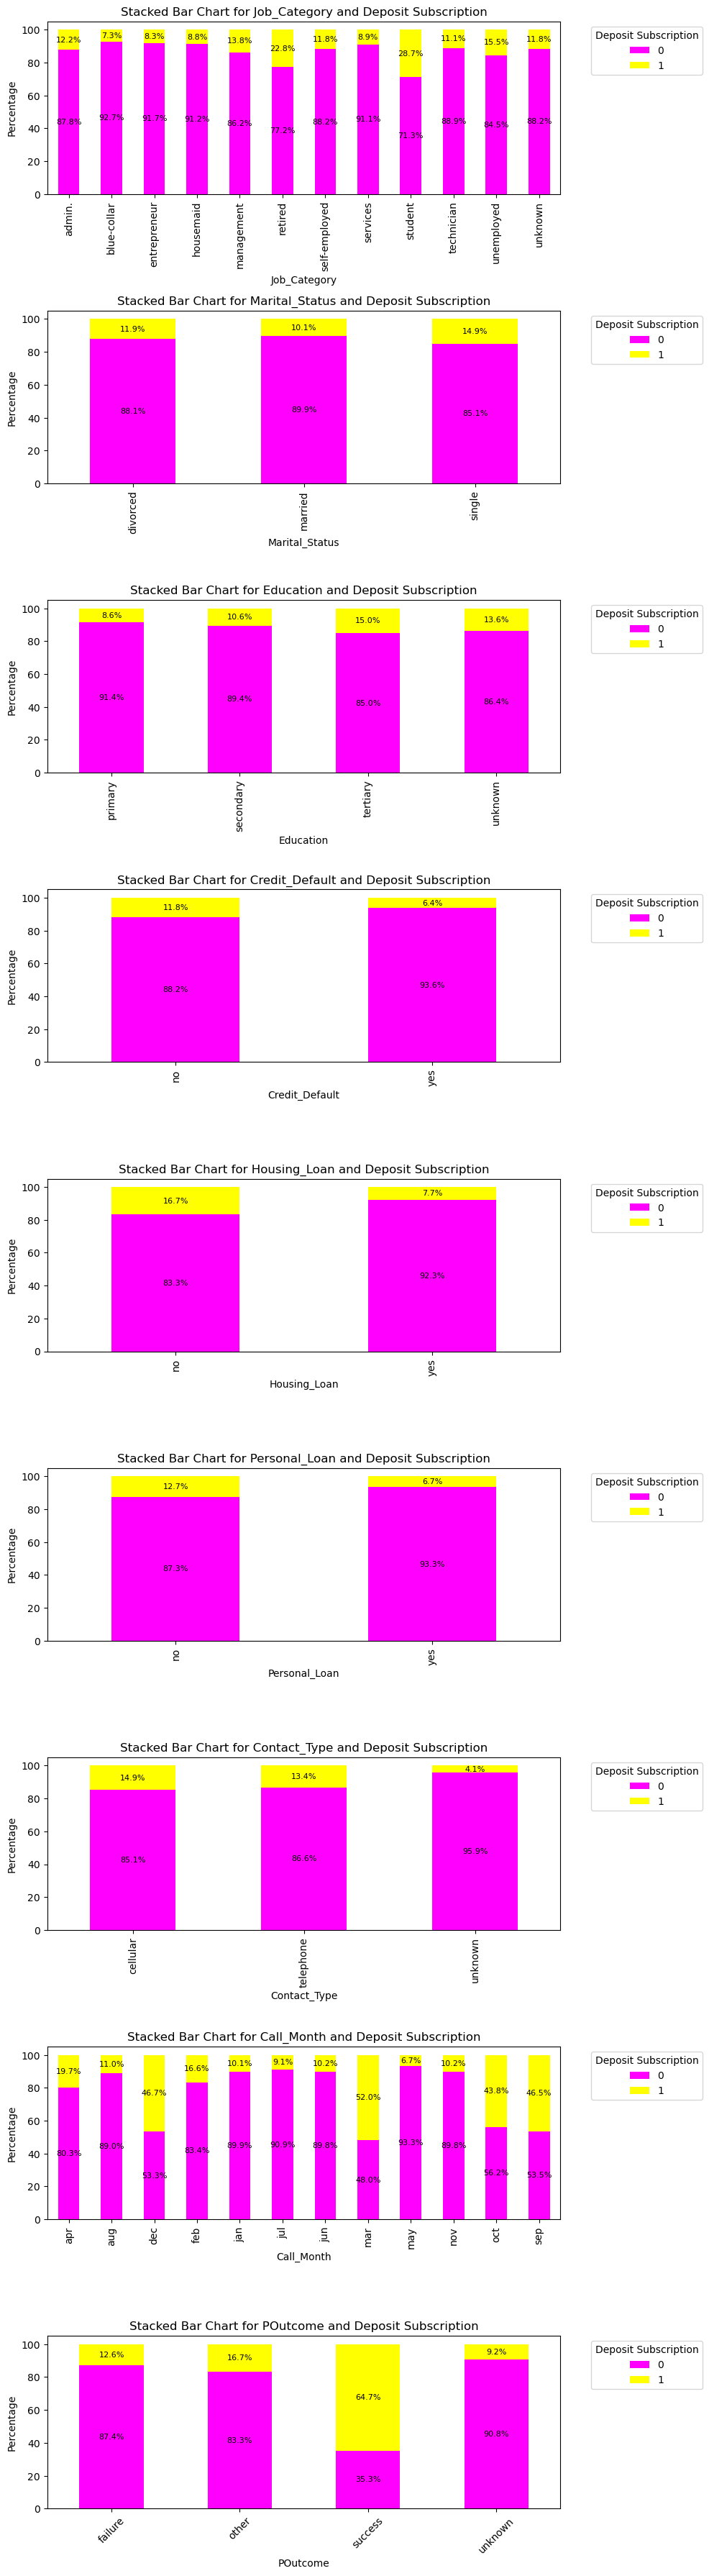

In [5]:
# Create subplots based on the number of categorical columns
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(10, 4 * len(categorical_cols)))

# Iterate over each categorical column
for i, category in enumerate(categorical_cols):
    # Create a DataFrame with the required information for each category
    category_subscription_df = df.groupby([category, 'Deposit_Subscription']).size().unstack()

    # Calculate the percentage for each category
    category_subscription_df_percentage = category_subscription_df.div(category_subscription_df.sum(axis=1), axis=0) * 100

    # Plot the stacked bar chart with text annotations
    ax = category_subscription_df_percentage.plot(kind='bar', stacked=True, colormap='spring', ax=axes[i])

    # Annotate each category with percentage values
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()    
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', color='black', fontsize=8)

    ax.set_title(f'Stacked Bar Chart for {category} and Deposit Subscription')
    ax.set_xlabel(category)
    ax.set_ylabel('Percentage')
    ax.legend(title=f'Deposit Subscription', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#### Numerical features Distribution

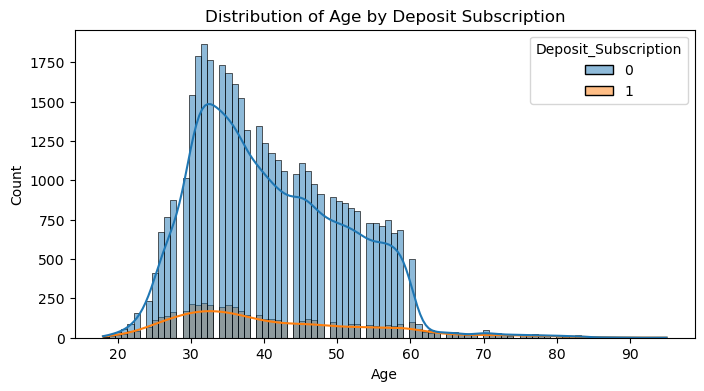

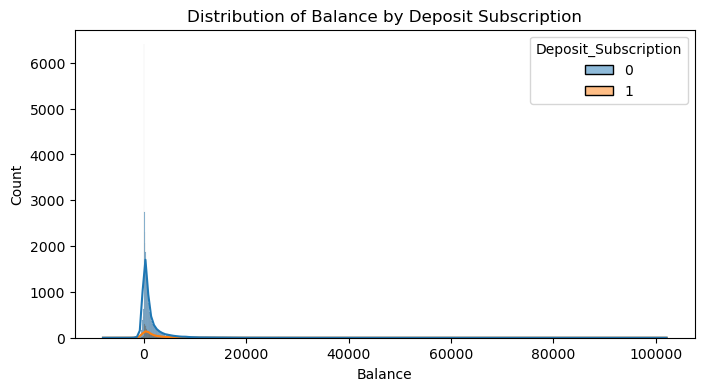

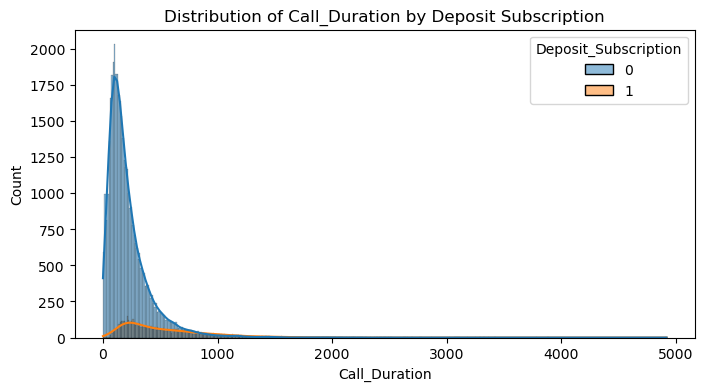

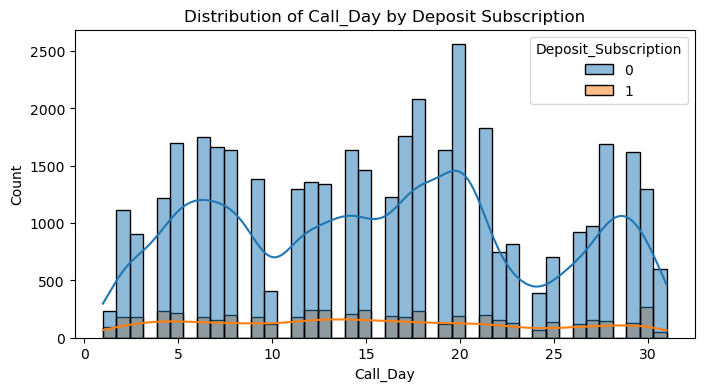

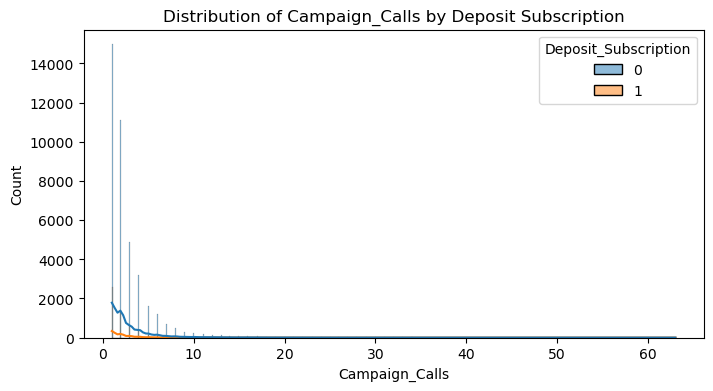

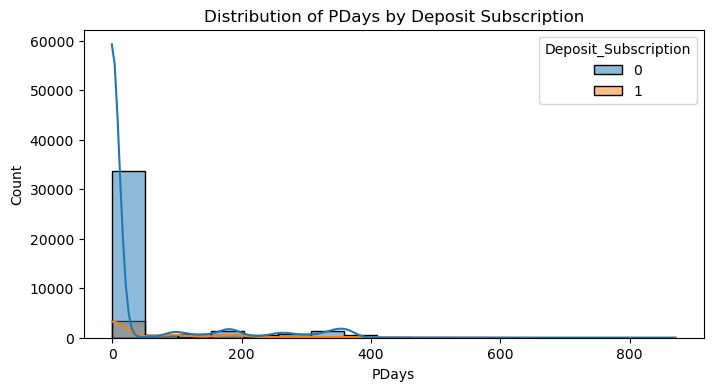

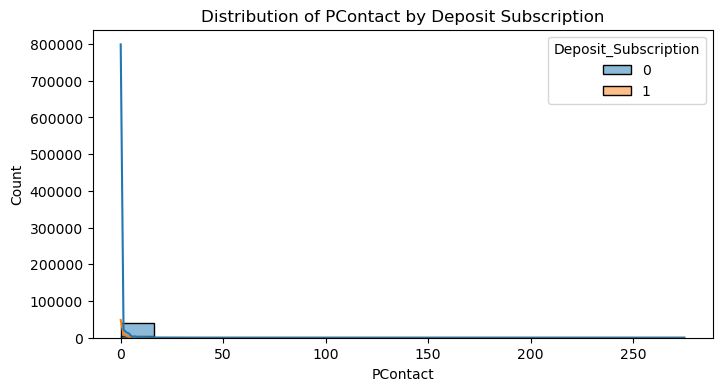

In [6]:
# Numerical features distribution

numerical_cols = ['Age', 'Balance', 'Call_Duration', 'Call_Day', 'Campaign_Calls', 'PDays', 'PContact']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df, x=col, kde=True, hue='Deposit_Subscription')
    plt.title(f'Distribution of {col} by Deposit Subscription')
    plt.show()

#### Boxplot for all numerical feautures to check the variables distribution

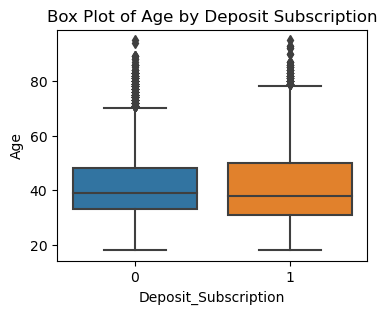

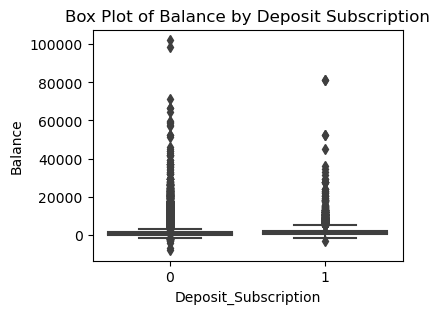

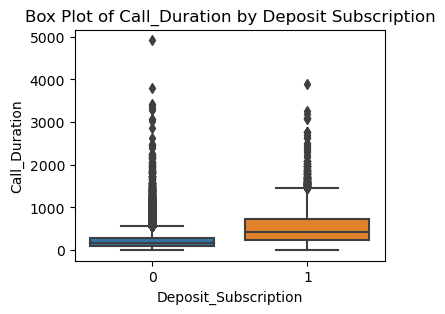

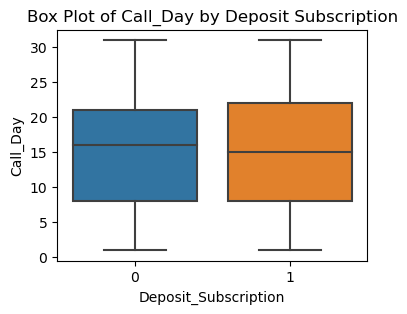

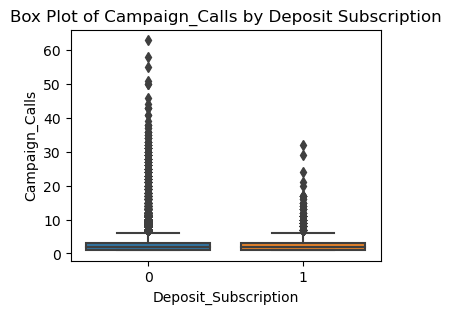

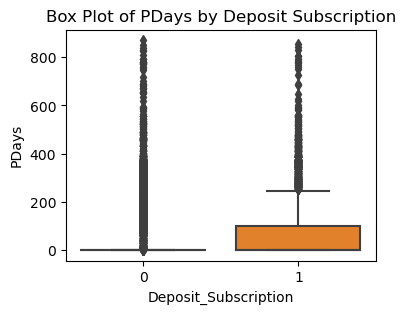

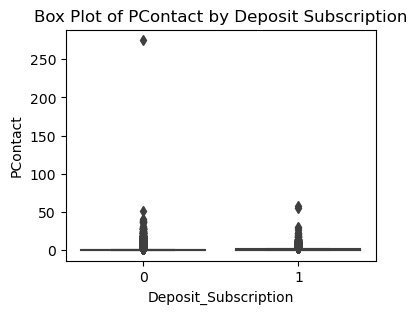

In [51]:
# Boxplot for outliers

for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x='Deposit_Subscription', y=col, data=df)
    plt.title(f'Box Plot of {col} by Deposit Subscription')
    plt.show()

#### Correlation Matrix

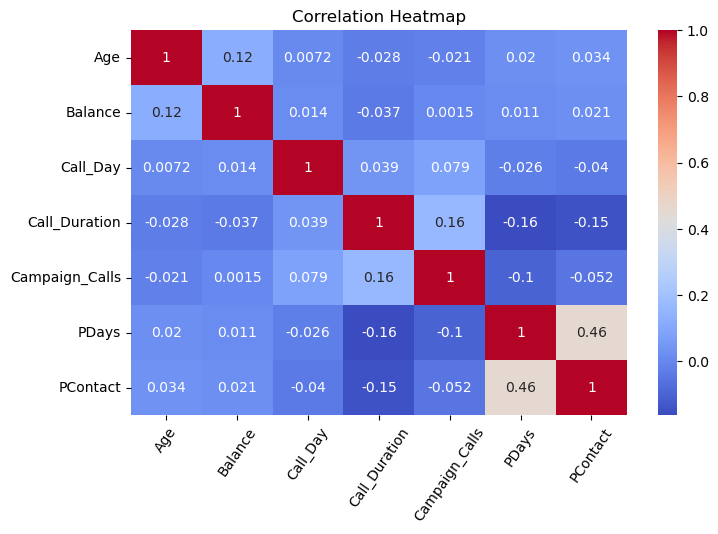

In [33]:
# Customers subscribed
subscribed_df = df[df['Deposit_Subscription'] == 1]

# Drop the 'Deposit_Subscription' column before creating the correlation matrix
df_without_target = subscribed_df.drop('Deposit_Subscription', axis=1)

# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_without_target.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=55)
plt.show()


#### Pairplot

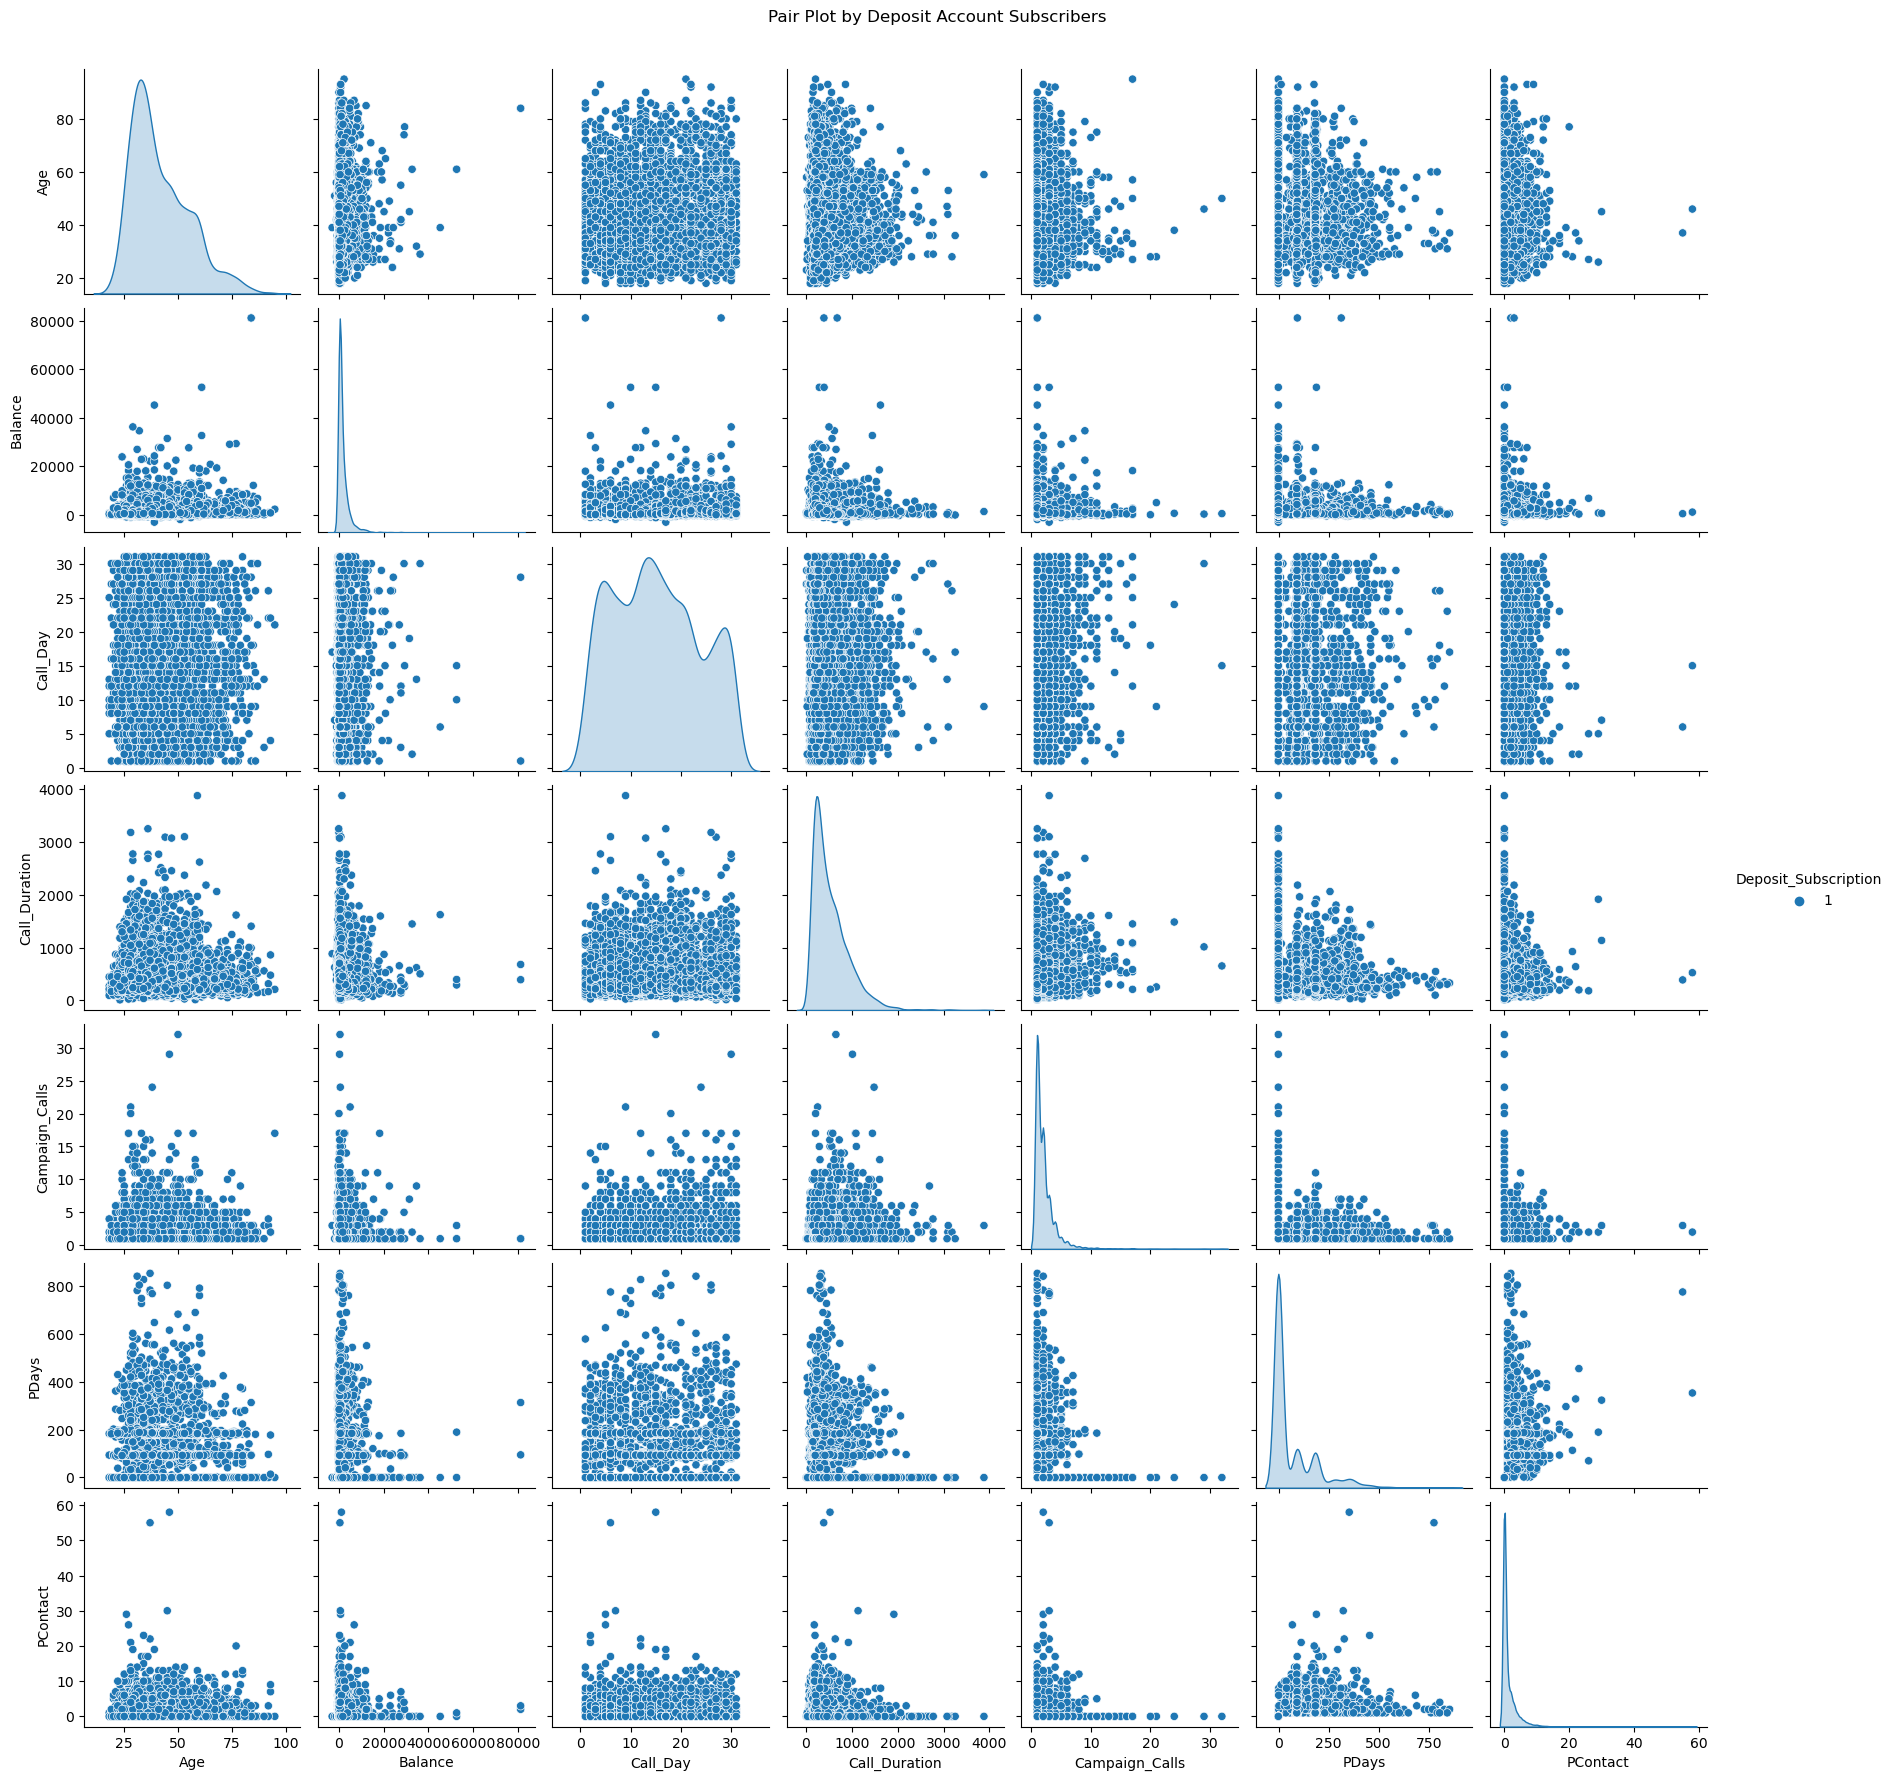

In [8]:
# Pairplot

sns.pairplot(subscribed_df, hue='Deposit_Subscription')
plt.suptitle('Pair Plot by Deposit Account Subscribers', y=1.02)
plt.show()

#### Logistic Regression Model

Intercept: -2.8529

Coefficients:
                       Feature  Coefficient
0                          Age     0.018008
1                      Balance     0.026886
2                     Call_Day     0.079410
3                Call_Duration     1.087097
4               Campaign_Calls    -0.283813
5                        PDays     0.006637
6                     PContact     0.017494
7     Job_Category_blue-collar    -0.118095
8    Job_Category_entrepreneur    -0.057664
9       Job_Category_housemaid    -0.069346
10     Job_Category_management    -0.066590
11        Job_Category_retired     0.044579
12  Job_Category_self-employed    -0.052375
13       Job_Category_services    -0.070462
14        Job_Category_student     0.043436
15     Job_Category_technician    -0.088897
16     Job_Category_unemployed    -0.024628
17        Job_Category_unknown    -0.037397
18      Marital_Status_married    -0.089692
19       Marital_Status_single     0.057359
20         Education_secondary     0.12445

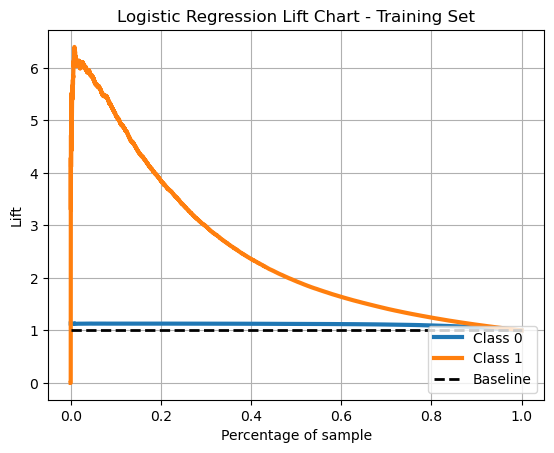

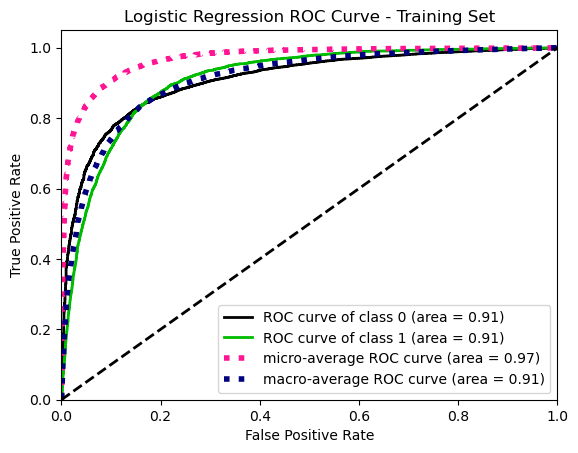


---------------------------

Testing Set:
Accuracy: 0.90

Confusion Matrix:
[[11657   309]
 [ 1048   550]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.64      0.34      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



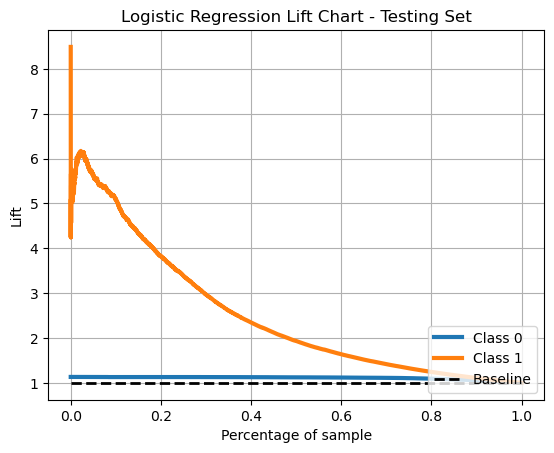

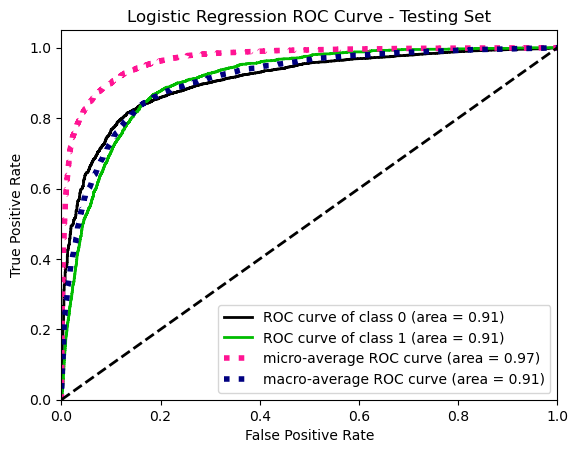

In [9]:
# Model 1: Logistic Regression Model

# Define features (X) and target variable (y)
X = df.drop('Deposit_Subscription', axis=1)
y = df['Deposit_Subscription']

# Encode categorical variables (one-hot encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Standardize the features (optional, but often beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = logreg_model.predict(X_train_scaled)

# Make predictions on the test set
y_test_pred = logreg_model.predict(X_test_scaled)

# Get the coefficients and intercept
coefficients = logreg_model.coef_[0]
intercept = logreg_model.intercept_[0]

# Get the feature names
feature_names = X_encoded.columns

# Create a DataFrame to display coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the intercept
print(f'Intercept: {intercept:.4f}')

# Display the coefficients
print("\nCoefficients:")
print(coefficients_df)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
classification_rep_train = classification_report(y_train, y_train_pred)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

# Display results
print("\n\nTraining Set:")
print(f"Accuracy: {accuracy_train:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_train)
print("\nClassification Report:")
print(classification_rep_train)

# Logistic Regression Lift Chart - Training Set
skplt.metrics.plot_lift_curve(y_train, logreg_model.predict_proba(X_train_scaled))
plt.title('Logistic Regression Lift Chart - Training Set')
plt.show()

# Logistic Regression ROC Curve - Training Set
skplt.metrics.plot_roc(y_train, logreg_model.predict_proba(X_train_scaled))
plt.title('Logistic Regression ROC Curve - Training Set')
plt.show()

print("\n---------------------------\n")

print("Testing Set:")
print(f"Accuracy: {accuracy_test:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_test)
print("\nClassification Report:")
print(classification_rep_test)

# Logistic Regression Lift Chart - Testing Set
skplt.metrics.plot_lift_curve(y_test, logreg_model.predict_proba(X_test_scaled))
plt.title('Logistic Regression Lift Chart - Testing Set')
plt.show()

# Logistic Regression ROC Curve - Testing Set
skplt.metrics.plot_roc(y_test, logreg_model.predict_proba(X_test_scaled))
plt.title('Logistic Regression ROC Curve - Testing Set')
plt.show()

#### Decision tree with maximum depth of 4

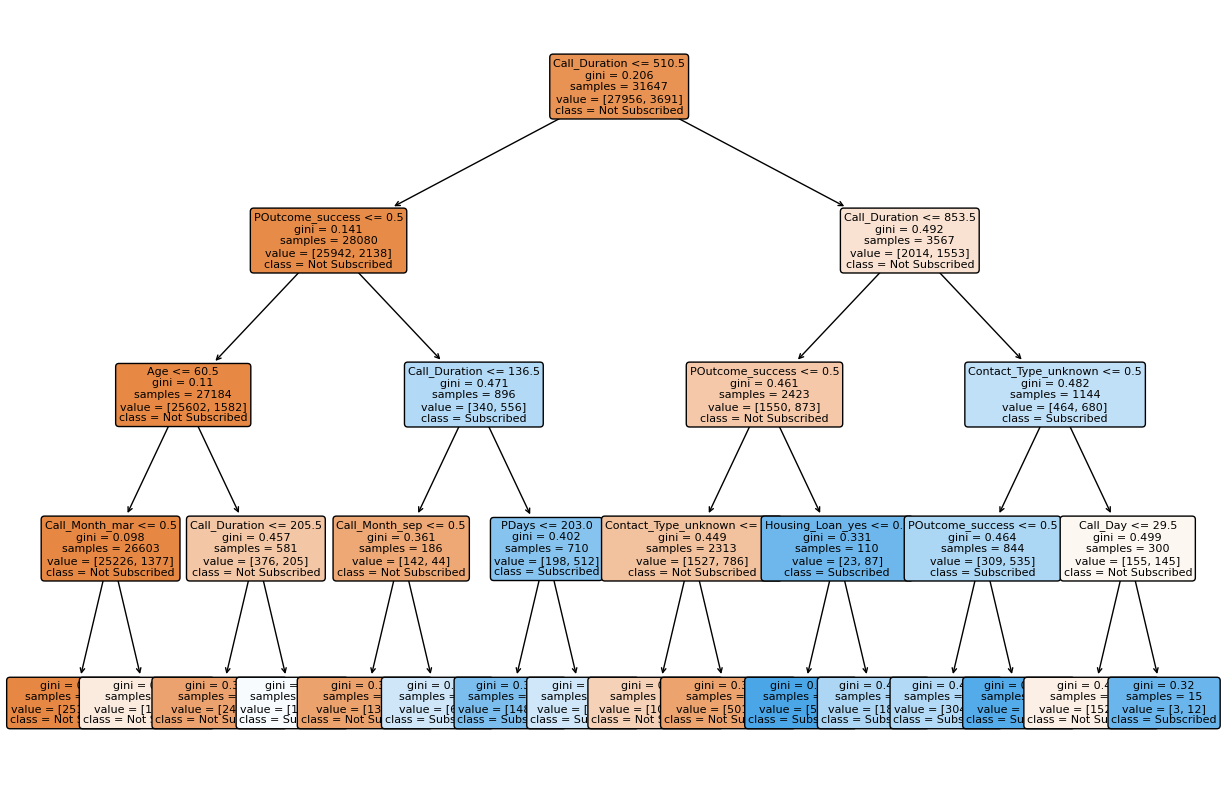

Training Set:
Accuracy: 0.90

Confusion Matrix:
[[27282   674]
 [ 2396  1295]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27956
           1       0.66      0.35      0.46      3691

    accuracy                           0.90     31647
   macro avg       0.79      0.66      0.70     31647
weighted avg       0.89      0.90      0.89     31647



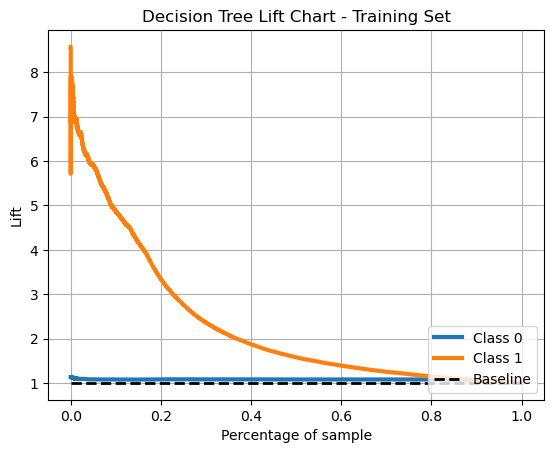

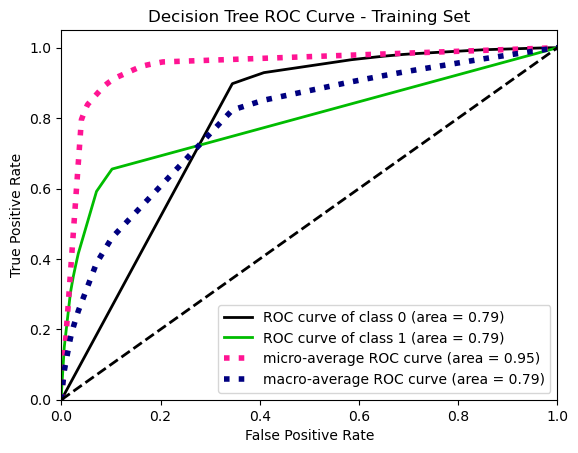


---------------------------

Testing Set:
Accuracy: 0.90

Confusion Matrix:
[[11643   323]
 [ 1069   529]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.62      0.33      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564



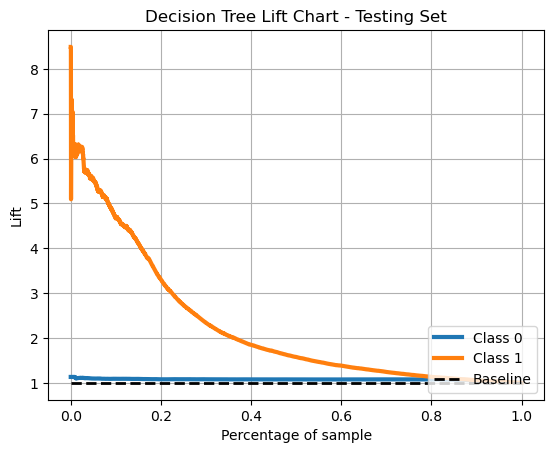

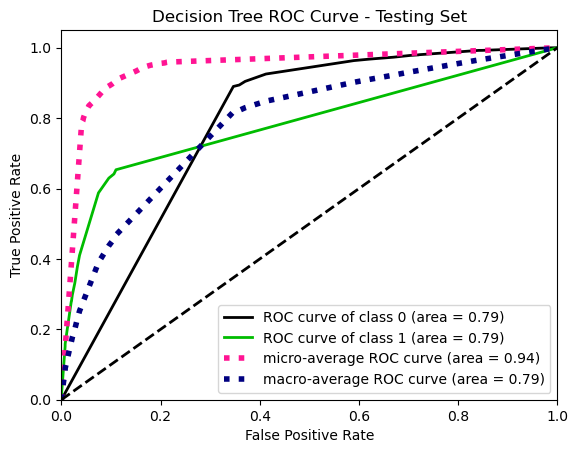

In [10]:
# Model 2: Decision tree

# Create a decision tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = dt_model.predict(X_train)

# Make predictions on the test set
y_test_pred = dt_model.predict(X_test)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X_encoded.columns, class_names=['Not Subscribed', 'Subscribed'], rounded=True, fontsize=8)
plt.show()

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
classification_rep_train = classification_report(y_train, y_train_pred)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

# Display results
print("Training Set:")
print(f"Accuracy: {accuracy_train:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_train)
print("\nClassification Report:")
print(classification_rep_train)

# Decision Tree Lift Chart - Training Set
skplt.metrics.plot_lift_curve(y_train, dt_model.predict_proba(X_train))
plt.title('Decision Tree Lift Chart - Training Set')
plt.show()

# Decision Tree ROC Curve - Training Set
skplt.metrics.plot_roc(y_train, dt_model.predict_proba(X_train))
plt.title('Decision Tree ROC Curve - Training Set')
plt.show()

print("\n---------------------------\n")

print("Testing Set:")
print(f"Accuracy: {accuracy_test:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_test)
print("\nClassification Report:")
print(classification_rep_test)

# Decision Tree Lift Chart - Testing Set
skplt.metrics.plot_lift_curve(y_test, dt_model.predict_proba(X_test))
plt.title('Decision Tree Lift Chart - Testing Set')
plt.show()

# Decision Tree ROC Curve - Testing Set
skplt.metrics.plot_roc(y_test, dt_model.predict_proba(X_test))
plt.title('Decision Tree ROC Curve - Testing Set')
plt.show()

#### Random Forest with optimum number of estimators = 130

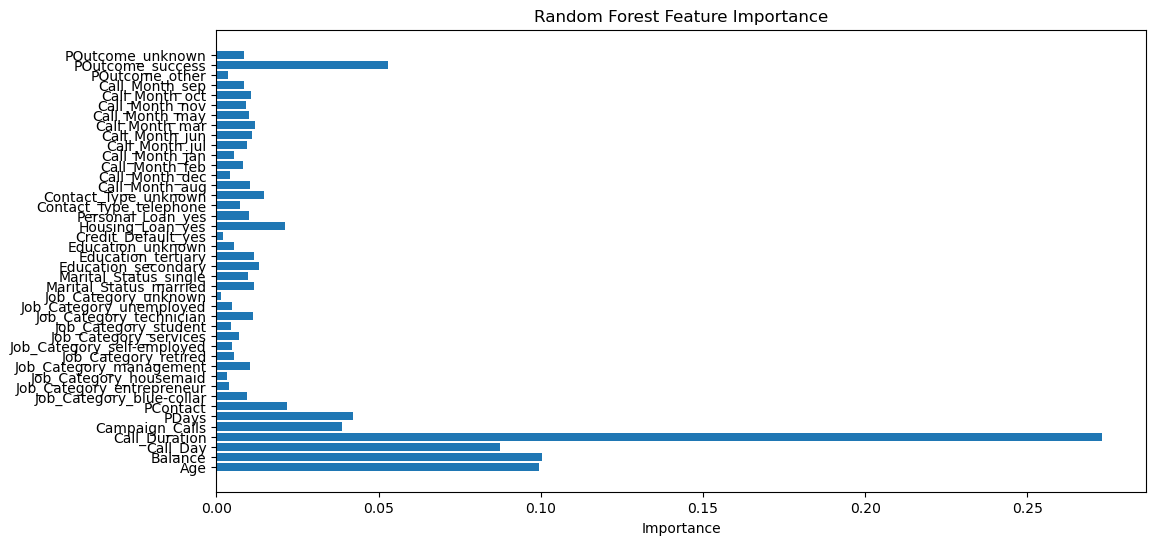

Training Set Metrics:
Accuracy: 1.00

Confusion Matrix:
[[27956     0]
 [    0  3691]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27956
           1       1.00      1.00      1.00      3691

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647



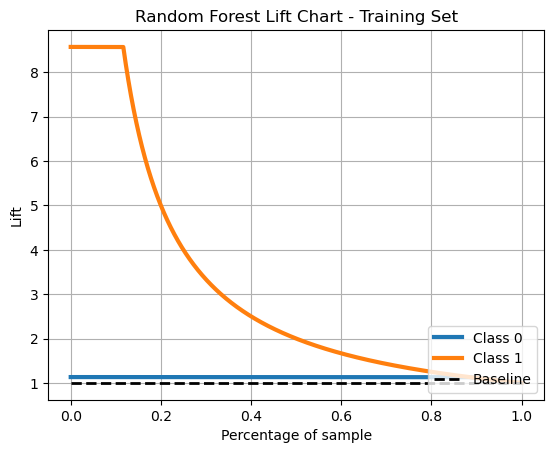

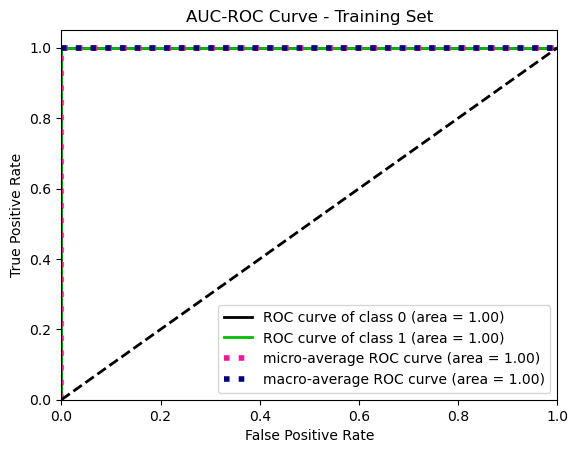


Test Set Metrics:
Accuracy: 0.91

Confusion Matrix:
[[11655   311]
 [  951   647]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.68      0.40      0.51      1598

    accuracy                           0.91     13564
   macro avg       0.80      0.69      0.73     13564
weighted avg       0.90      0.91      0.90     13564



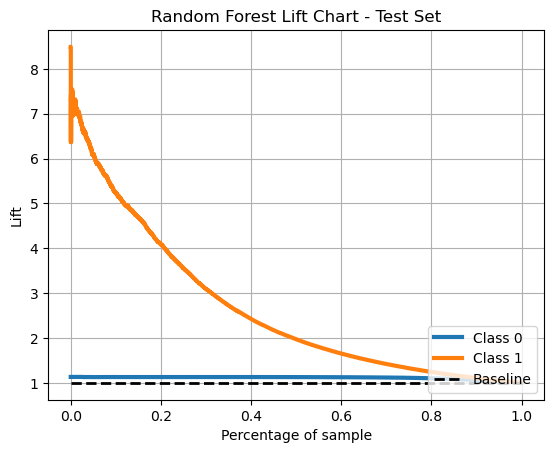

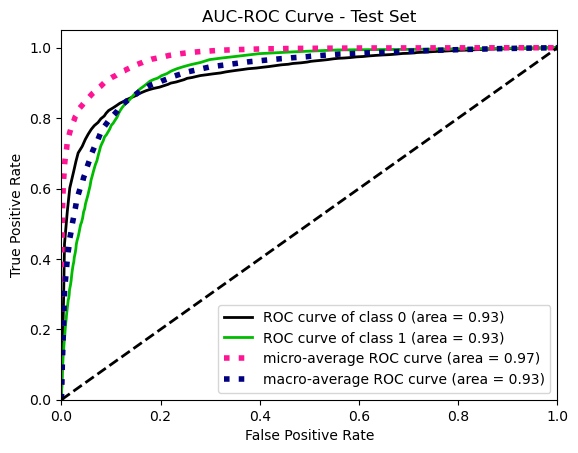

In [18]:
# Model 3: Random Forest

# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=130)

# Train the model on the training set
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred_rf = rf_model.predict(X_train_scaled)

# Evaluate the model on the training set
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
conf_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
classification_rep_train_rf = classification_report(y_train, y_train_pred_rf)

# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)
classification_rep_test_rf = classification_report(y_test, y_test_pred_rf)

# Feature Importance Plot
feature_importances = rf_model.feature_importances_
feature_names = X_encoded.columns

plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importances)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.show()

# Display results for training set
print("Training Set Metrics:")
print(f"Accuracy: {accuracy_train_rf:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_train_rf)
print("\nClassification Report:")
print(classification_rep_train_rf)

# Random Forest Lift Chart - Training Set
skplt.metrics.plot_lift_curve(y_train, rf_model.predict_proba(X_train_scaled))
plt.title('Random Forest Lift Chart - Training Set')
plt.show()

# AUC-ROC Curve for Training Set
skplt.metrics.plot_roc(y_train, rf_model.predict_proba(X_train_scaled))
plt.title('AUC-ROC Curve - Training Set')
plt.show()

# Display results for test set
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test_rf:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_test_rf)
print("\nClassification Report:")
print(classification_rep_test_rf)

# Random Forest Lift Chart - Test Set
skplt.metrics.plot_lift_curve(y_test, rf_model.predict_proba(X_test_scaled))
plt.title('Random Forest Lift Chart - Test Set')
plt.show()

# AUC-ROC Curve for Test Set
skplt.metrics.plot_roc(y_test, rf_model.predict_proba(X_test_scaled))
plt.title('AUC-ROC Curve - Test Set')
plt.show()


#### Naive Bayes Model

Naive Bayes Training Set Metrics:
Accuracy: 0.86

Confusion Matrix:
[[25422  2534]
 [ 1810  1881]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     27956
           1       0.43      0.51      0.46      3691

    accuracy                           0.86     31647
   macro avg       0.68      0.71      0.69     31647
weighted avg       0.87      0.86      0.87     31647



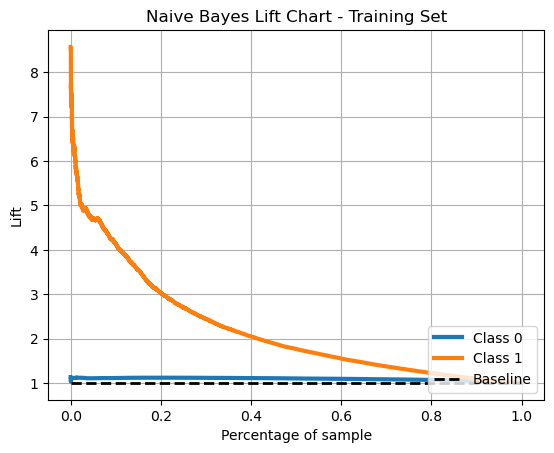

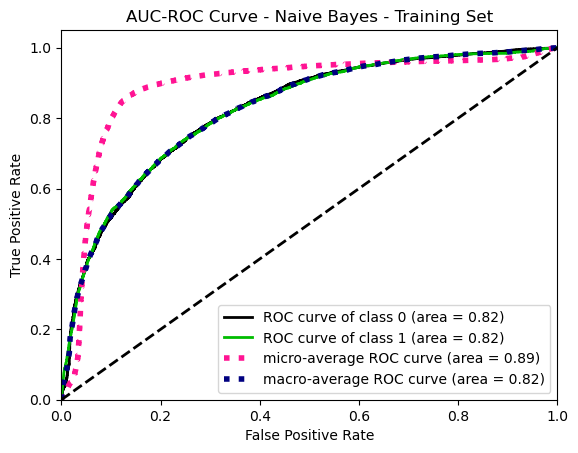


Naive Bayes Test Set Metrics:
Accuracy: 0.86

Confusion Matrix:
[[10857  1109]
 [  806   792]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     11966
           1       0.42      0.50      0.45      1598

    accuracy                           0.86     13564
   macro avg       0.67      0.70      0.69     13564
weighted avg       0.87      0.86      0.86     13564



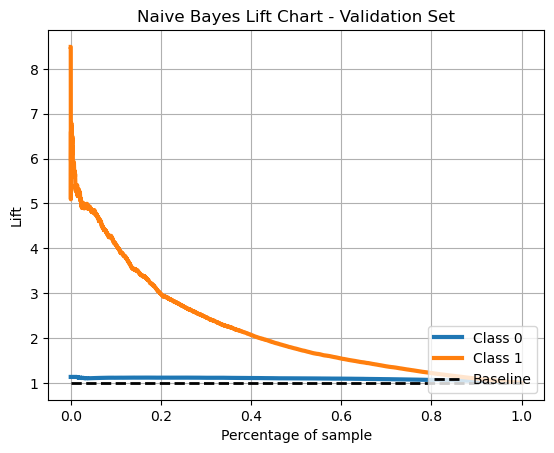

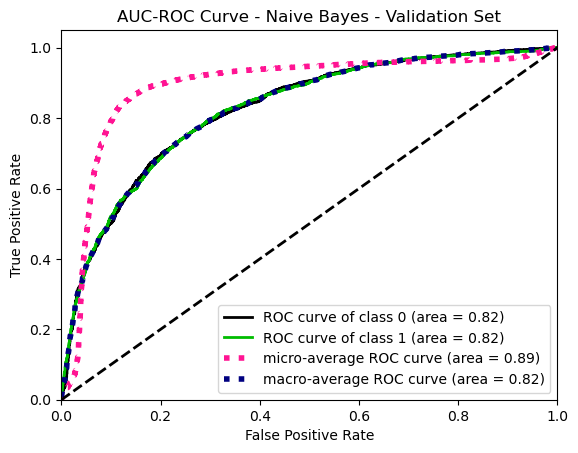

In [17]:
# Model 4: Naive-Bayes Model

# Create a Naive Bayes classifier
nb_model = GaussianNB()

# Train the model on the training set
nb_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_nb = nb_model.predict(X_train)

# Make predictions on the validation set
y_test_pred_nb = nb_model.predict(X_test)

# Evaluate the model on the training set
accuracy_train_nb = accuracy_score(y_train, y_train_pred_nb)
conf_matrix_train_nb = confusion_matrix(y_train, y_train_pred_nb)
classification_rep_train_nb = classification_report(y_train, y_train_pred_nb)

# Evaluate the model on the validation set
accuracy_test_nb = accuracy_score(y_test, y_test_pred_nb)
conf_matrix_test_nb = confusion_matrix(y_test, y_test_pred_nb)
classification_rep_test_nb = classification_report(y_test, y_test_pred_nb)

# Display results for Naive Bayes on the training set
print("Naive Bayes Training Set Metrics:")
print(f"Accuracy: {accuracy_train_nb:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_train_nb)
print("\nClassification Report:")
print(classification_rep_train_nb)

# Naive Bayes Lift Chart - Training Set
skplt.metrics.plot_lift_curve(y_train, nb_model.predict_proba(X_train))
plt.title('Naive Bayes Lift Chart - Training Set')
plt.show()

# AUC-ROC Curve for Naive Bayes - Training Set
skplt.metrics.plot_roc(y_train, nb_model.predict_proba(X_train))
plt.title('AUC-ROC Curve - Naive Bayes - Training Set')
plt.show()

# Display results for Naive Bayes on the validation set
print("\nNaive Bayes Test Set Metrics:")
print(f"Accuracy: {accuracy_test_nb:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_test_nb)
print("\nClassification Report:")
print(classification_rep_test_nb)

# Naive Bayes Lift Chart - Validation Set
skplt.metrics.plot_lift_curve(y_test, nb_model.predict_proba(X_test))
plt.title('Naive Bayes Lift Chart - Validation Set')
plt.show()

# AUC-ROC Curve for Naive Bayes - Validation Set
skplt.metrics.plot_roc(y_test, nb_model.predict_proba(X_test))
plt.title('AUC-ROC Curve - Naive Bayes - Validation Set')
plt.show()

#### Knn - Model

KNN Training Set Metrics:
Accuracy: 0.90

Confusion Matrix:
[[27648   308]
 [ 2732   959]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     27956
           1       0.76      0.26      0.39      3691

    accuracy                           0.90     31647
   macro avg       0.83      0.62      0.67     31647
weighted avg       0.89      0.90      0.88     31647



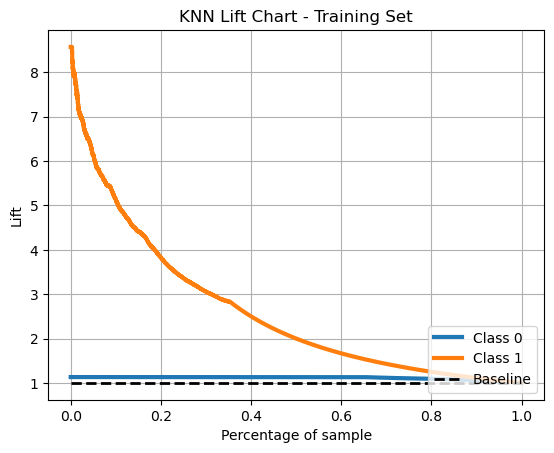

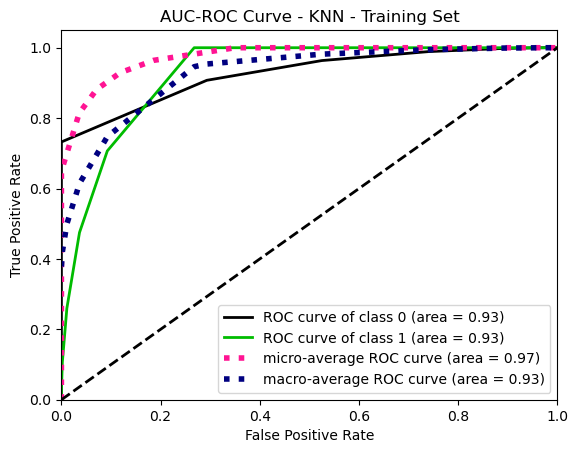


KNN Test Set Metrics:
Accuracy: 0.88

Confusion Matrix:
[[11681   285]
 [ 1297   301]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.51      0.19      0.28      1598

    accuracy                           0.88     13564
   macro avg       0.71      0.58      0.61     13564
weighted avg       0.85      0.88      0.86     13564



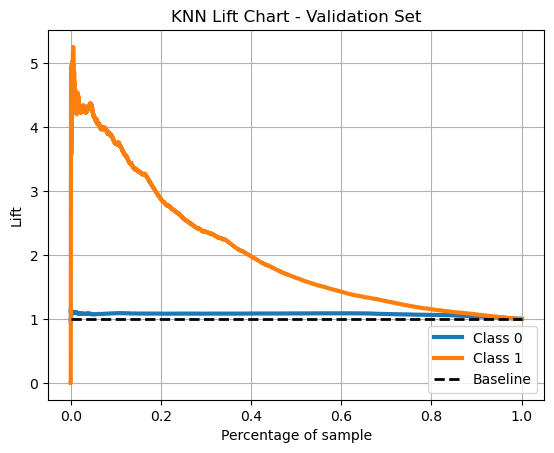

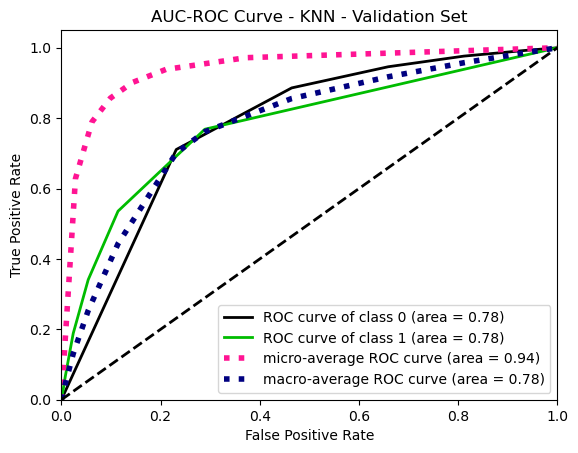

In [26]:
# Model 5: Knn Model

# Create a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=6)

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_knn = knn_model.predict(X_train)

# Make predictions on the validation set
y_test_pred_knn = knn_model.predict(X_test)

# Evaluate the model on the training set
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn)
conf_matrix_train_knn = confusion_matrix(y_train, y_train_pred_knn)
classification_rep_train_knn = classification_report(y_train, y_train_pred_knn)

# Evaluate the model on the validation set
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)
conf_matrix_test_knn = confusion_matrix(y_test, y_test_pred_knn)
classification_rep_test_knn = classification_report(y_test, y_test_pred_knn)

# Display results for KNN on the training set
print("KNN Training Set Metrics:")
print(f"Accuracy: {accuracy_train_knn:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_train_knn)
print("\nClassification Report:")
print(classification_rep_train_knn)

# KNN Lift Chart - Training Set
skplt.metrics.plot_lift_curve(y_train, knn_model.predict_proba(X_train))
plt.title('KNN Lift Chart - Training Set')
plt.show()

# AUC-ROC Curve for KNN - Training Set
skplt.metrics.plot_roc(y_train, knn_model.predict_proba(X_train))
plt.title('AUC-ROC Curve - KNN - Training Set')
plt.show()

# Display results for KNN on the validation set
print("\nKNN Test Set Metrics:")
print(f"Accuracy: {accuracy_test_knn:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_test_knn)
print("\nClassification Report:")
print(classification_rep_test_knn)

# KNN Lift Chart - Validation Set
skplt.metrics.plot_lift_curve(y_test, knn_model.predict_proba(X_test))
plt.title('KNN Lift Chart - Validation Set')
plt.show()

# AUC-ROC Curve for KNN - Validation Set
skplt.metrics.plot_roc(y_test, knn_model.predict_proba(X_test))
plt.title('AUC-ROC Curve - KNN - Validation Set')
plt.show()